# Plotting dNTP Incorporation Rate Along Sequence Length
Figure S9a (cutoff = 5.8)

In [1]:
# Import modules
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

from turtles.turtles_utils import *

## Set Filepaths

In [2]:
#: Signal names
signals = ['Ca', 'Co', 'Zn', 'Temp']

#: Overall directory for TdT project data and analysis
tdt_dir = 'C:/Users/jonst/Box Sync/All_dNTP_Data/Data_and_Results/'

#: Subdirectories of NGS runs
data_dir = {}
data_dir['Ca'] = tdt_dir + 'All_Data_Filtered_Trimmed/Ca_Controls/'
data_dir['Co'] = tdt_dir + 'All_Data_Filtered_Trimmed/Co_01_paired_simple_cut/'
data_dir['Zn'] = tdt_dir + 'All_Data_Filtered_Trimmed/Zn_Controls/'
data_dir['Temp'] = tdt_dir + 'All_Data_Filtered_Trimmed/Temp_101_gt0/'

#: Filename prefixes for 0 control conditions (Zn is mislabeled)
zero_control_conds = {}
zero_control_conds['Ca'] = ['NB_1MgTdTEnd-157462365',
                            'NB_2MgTdTEnd-157471352',
                            'NB_3MgTdTEnd-157460349',
                            'NB_4MgTdTEnd-157478337',
                            'NB_5MgTdTEnd-157474355',
                            'NB_6MgTdTEnd-157471356',
                            'NB_7MgTdTEnd-157469351']
zero_control_conds['Co'] = ['Namita_23630_Mg_Col_T0_1-167005853',
                            'Namita_23630_Mg_Col_T0_2-166999859',
                            'Namita_23630_Mg_Col_T0_3-167009845']
zero_control_conds['Zn'] = ['24755_Mg_2-215601402',
                            '24755_Mg_3-215601397',
                            '24755_ZnAc_1-215601398']
zero_control_conds['Temp'] = ['A4-FLD0289-37-1hr-1-242370305',
                              'A4-FLD0290-37-1h-2-242367356',
                              'A4-FLD0291-37-1hr-3-242383179']

#: Filename prefixes for 1 control conditions (Zn is mislabeled)
one_control_conds = {}
one_control_conds['Ca'] = ['NB_1CaTdTEnd-157464345',
                           'NB_2CaTdTEnd-157461337',
                           'NB_3CaTdTEnd-157467349',
                           'NB_4CaTdTEnd-157478336',
                           'NB_5CaTdTEnd-157471355',
                           'NB_6CaTdTEnd-157466351',
                           'NB_7CaTdTEnd-157467351']
one_control_conds['Co'] = ['Namita_23630_Cobalt_Col_T0_1-167010847',
                           'Namita_23630_Cobalt_Col_T0_2-166993853',
                           'Namita_23630_Cobalt_Col_T0_3-166999858']
one_control_conds['Zn'] = ['24755_ZnAc_2-215601399',
                           '24755_ZnAc_3-215601401',
                           '24755_No_TdT-215601400']
one_control_conds['Temp'] = ['A4-FLD0301-20-1hr-1-242375258',
                             'A4-FLD0302-20-1hr-2-242372261',
                             'A4-FLD0303-20-1hr-3-242369283']

#: suffix of R1 fastq file to read in each directory
filename_end = 'trimmed.fq'

#: Directory to save generated figures in - it gets created if not present already
figure_dir = tdt_dir + '/%dNTP_Charts/'
os.makedirs(os.path.dirname(figure_dir), exist_ok=True)

## Load and Bin Sequences
Note: Binning can take a while.

In [4]:
counts_dict = {}
for signal in signals:
    cond_text = zero_control_conds[signal] + one_control_conds[signal]
    seqs_dict = read_seqs(data_dir[signal], filename_end=filename_end, cutoff=5.8,
                          cond_text=cond_text)
    counts_dict[signal] = get_norm_len_base_counts(seqs_dict, num_bins=1000)

Loading NB_1CaTdTEnd-157464345
Read 841185 sequences...

Loading NB_1MgTdTEnd-157462365
Read 795971 sequences...

Loading NB_2CaTdTEnd-157461337
Read 815608 sequences...

Loading NB_2MgTdTEnd-157471352
Read 843687 sequences...

Loading NB_3CaTdTEnd-157467349
Read 861134 sequences...

Loading NB_3MgTdTEnd-157460349
Read 831850 sequences...

Loading NB_4CaTdTEnd-157478336
Read 839897 sequences...

Loading NB_4MgTdTEnd-157478337
Read 824431 sequences...

Loading NB_5CaTdTEnd-157471355
Read 788042 sequences...

Loading NB_5MgTdTEnd-157474355
Read 765218 sequences...

Loading NB_6CaTdTEnd-157466351
Read 803376 sequences...

Loading NB_6MgTdTEnd-157471356
Read 780802 sequences...

Loading NB_7CaTdTEnd-157467351
Read 830991 sequences...

Loading NB_7MgTdTEnd-157469351
Read 797989 sequences...

NB_1CaTdTEnd-157464345 processed

NB_1MgTdTEnd-157462365 processed

NB_2CaTdTEnd-157461337 processed

NB_2MgTdTEnd-157471352 processed

NB_3CaTdTEnd-157467349 processed

NB_3MgTdTEnd-157460349 processed

### Convert counts to percents

In [5]:
pcts_dict = {}
clr_data = {}
for signal in signals:
    pcts_dict[signal] = calc_norm_len_base_pcts(counts_dict[signal])
    # Calculate aitchison distance just so we can use the dataframe formatting function
    clr_data[signal] = calc_aitchison_distance(pcts_dict[signal])

## Choose Legend Labels for Plotting
### Condition Labels

In [6]:
condition_dict = {signal: {} for signal in signals}

# Ca
for condition in pcts_dict['Ca']:
    if 'CaTdTEnd' in condition:
        condition_dict['Ca'][condition] = 'Mg+Ca Control'
    elif 'MgTdTEnd' in condition:
        condition_dict['Ca'][condition] = 'Mg Control (Ca)'
    else:
        print('Error: {} not recognized'.format(condition))

# Co
for condition in pcts_dict['Co']:
    if 'Cobalt_Col_T0' in condition:
        condition_dict['Co'][condition] = 'Mg+Co Control'
    elif 'Mg_Col_T0' in condition:
        condition_dict['Co'][condition] = 'Mg Control (Co)'
    else:
        print('Error: {} not recognized'.format(condition))

# Zn
for condition in pcts_dict['Zn']:
    if '_ZnAc_2' in condition or '_ZnAc_3' in condition or '_No_TdT' in condition:
        condition_dict['Zn'][condition] = 'Mg+Zn Control'
    elif '_Mg_2' in condition or '_Mg_3' in condition or '_ZnAc_1' in condition:
        condition_dict['Zn'][condition] = 'Mg Control (Zn)'
    else:
        print('Error: {} not recognized'.format(condition))

# Temp
for condition in pcts_dict['Temp']:
    if '37-1h' in condition:
        condition_dict['Temp'][condition] = '37C Control'
    elif '20-1hr' in condition:
        condition_dict['Temp'][condition] = '20C Control'
    else:
        print('Error: {} not recognized'.format(condition))

### Replicate Labels

In [7]:
rep_dict = {signal: {} for signal in signals}
rep_char = {'Ca': 3, 'Co': -11, 'Zn': -11, 'Temp': -11}

for signal in signals:
    for directory in pcts_dict[signal]:
        if signal == 'Zn' and directory[rep_char[signal]] == 'T':
            rep = 1  # Zn conditions are mislabeled - 'No_TdT' directory is actually 1 control
        else:
            rep = int(directory[rep_char[signal]])
        rep_dict[signal][directory] = rep

### Convert Data into Long-Form pandas DataFrame for Plotting

In [9]:
def label_signal(row, zero_control_conds, one_control_conds):
    """Determine if directory is 0 or 1 control (or neither)."""
    
    if row['Directory'] in zero_control_conds:
        label = 0
    elif row['Directory'] in one_control_conds:
        label = 1
    else:
        label = np.nan
    
    return label

In [10]:
data = {}
# We only need the A, C, G, and T frequency columns
drop_cols = ['Aitch Dist (from 0)', 'Aitch Dist (from 1)', 'A % Aitch', 'C % Aitch', 'G % Aitch',
             'T % Aitch', 'A % Aitch Diff from 0', 'A % Aitch Diff from 0',
             'C % Aitch Diff from 0', 'G % Aitch Diff from 0', 'T % Aitch Diff from 0',
             'A % Aitch Diff from 1', 'C % Aitch Diff from 1', 'G % Aitch Diff from 1',
             'T % Aitch Diff from 1']

for signal in signals:
    data[signal] = generate_aitch_df(pcts_dict[signal], clr_data[signal], condition_dict[signal],
                                     rep_dict[signal], zero_control_conds[signal],
                                     one_control_conds[signal])
    data[signal] = data[signal].drop(drop_cols, axis=1)
    data[signal] = data[signal].melt(id_vars=['Directory', 'Condition', 'Replicate', 'Bin Number'],
                                     value_vars=['A %', 'C %', 'G %', 'T %'],
                                     var_name='Base', value_name='dNTP %')
    
    signal_col = data[signal].apply(lambda row: label_signal(row, zero_control_conds[signal],
                                                             one_control_conds[signal]), axis=1)
    
    data[signal]['Signal'] = signal_col
    
    print(data[signal].head())

                Directory      Condition  Replicate  Bin Number Base   dNTP %  \
0  NB_1CaTdTEnd-157464345  Mg+Ca Control          1           1  A %  0.22683   
1  NB_1CaTdTEnd-157464345  Mg+Ca Control          1           2  A %  0.22683   
2  NB_1CaTdTEnd-157464345  Mg+Ca Control          1           3  A %  0.22683   
3  NB_1CaTdTEnd-157464345  Mg+Ca Control          1           4  A %  0.22683   
4  NB_1CaTdTEnd-157464345  Mg+Ca Control          1           5  A %  0.22683   

   Signal  
0       1  
1       1  
2       1  
3       1  
4       1  
                                Directory      Condition  Replicate  \
0  Namita_23630_Cobalt_Col_T0_1-167010847  Mg+Co Control          1   
1  Namita_23630_Cobalt_Col_T0_1-167010847  Mg+Co Control          1   
2  Namita_23630_Cobalt_Col_T0_1-167010847  Mg+Co Control          1   
3  Namita_23630_Cobalt_Col_T0_1-167010847  Mg+Co Control          1   
4  Namita_23630_Cobalt_Col_T0_1-167010847  Mg+Co Control          1   

   Bin Number 

## Plot dNTP over Sequence Length
### Choose colors

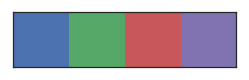

In [11]:
sns.set(style='white', font='times-new-roman', font_scale=2, rc={'lines.linewidth': 5})
color_palette = sns.color_palette([[76/255, 114/255, 176/255, 1],
                                   [85/255, 168/255, 104/255, 1],
                                   [199/255, 87/255, 91/255, 1],
                                   [129/255, 114/255, 178/255, 1]],
                                  n_colors=4)
sns.palplot(color_palette)

### Plot % dNTP for each Signal on LineGraph with Error

C:\Users\jonst\Anaconda3\envs\bioinformatics\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['times-new-roman'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\jonst\Anaconda3\envs\bioinformatics\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['times-new-roman'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


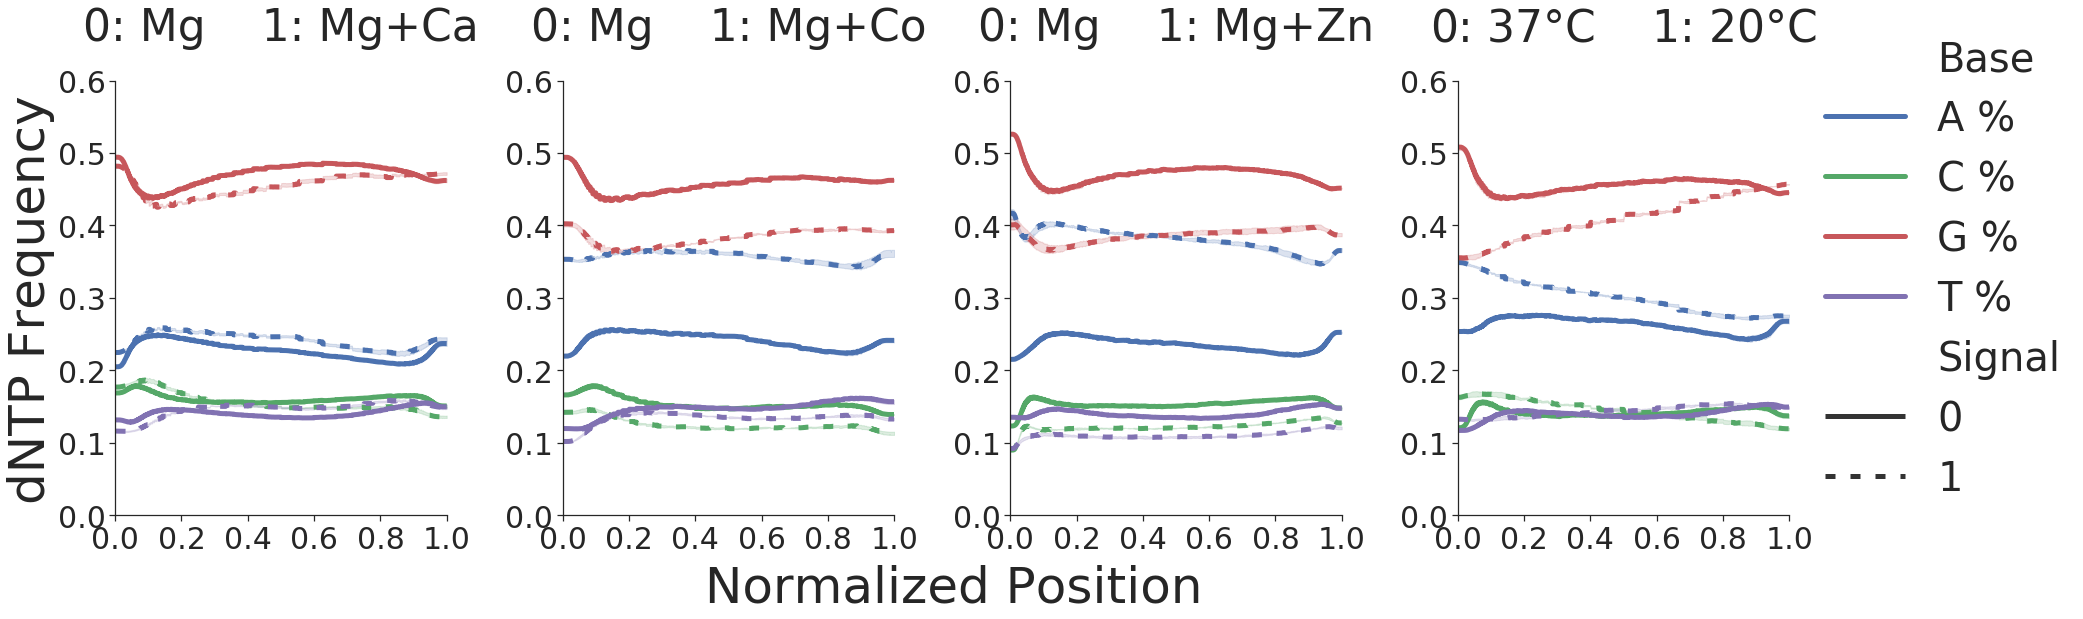

In [13]:
fig, axmatrix = plt.subplots(ncols=4, figsize=(30, 8), sharey=True)

num_bins=1000

for i, signal in enumerate(signals):
    ax = axmatrix[i]
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Display legend on last graph only
    if i == len(signals) - 1:
        legend = 'brief'
    else:
        legend = False
        
    sns.lineplot(x='Bin Number', y='dNTP %', hue='Base',
                 data=data[signal],
                 style='Signal', dashes={-1: (1, 0), 0: (1, 0), 1: (2, 3)},
                 palette=color_palette, ax=ax, legend=legend, err_kws={'alpha': 0.2})
    
    if legend:
        plt.legend(loc=(1.06, 0.0), fontsize=40, frameon=False)
    
    ax.tick_params(labelleft=True, left=True, bottom=True)

    ax.set_xlim(0, num_bins)
    ax.set_ylim(0, 0.6)
    
    ax.set_xticks(range(0, num_bins + 1, 200))
    ax.set_xticklabels(np.arange(0, 1.1, 0.2, dtype=np.float32), fontsize=30)
    ax.set_yticklabels(np.arange(0, 0.7, 0.1, dtype=np.float32), fontsize=30)
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    if signal == 'Temp':
        ax.set_title('0: 37' + r'$\degree$' + 'C    1: 20' + r'$\degree$' + 'C', fontsize=44,
                     pad=40)
    else:
        ax.set_title('0: Mg    1: Mg+{}'.format(signal), fontsize=44, pad=40)

fig.text(0.513, -0.025, 'Normalized Position', ha='center', fontsize=50)
fig.text(0.075, 0.5, 'dNTP Frequency', va='center', fontsize=50, rotation='vertical')

plt.subplots_adjust(wspace=.35, hspace=.25)

fig.savefig(figure_dir + 'dNTP_incorporation_Summary_Final_Cutoff', bbox_inches='tight')
plt.show()